In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub

path = kagglehub.dataset_download("syahrulapriansyah2/myanimelist-2025")

print("Path to dataset files:", path)

100%|██████████| 9.57M/9.57M [00:00<00:00, 36.4MB/s]

Extracting files...


Path to dataset files: C:\Users\Jensen\.cache\kagglehub\datasets\syahrulapriansyah2\myanimelist-2025\versions\1


In [6]:
import pandas as pd

In [7]:
animes = pd.read_csv(f"{path}/mal_anime.csv")

In [8]:
animes

,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19926,62876,Saijo no Osewa: Takane no Hanadarake na Meimon...,"A high school boy, Itsuki Tomonari, gets invol...",https://cdn.myanimelist.net/images/anime/1962/...,Unknown,Unknown,Not yet aired,NaN,NaN,NaN,...,NaN,Unknown,NaN,NaN,NaN,#15824,764,1,NaN,https://myanimelist.net/anime/62876/Saijo_no_O...
19927,62882,Mahou Shoujo holoWitch! The Stage: Trick or Ma...,No synopsis information has been added to this...,https://cdn.myanimelist.net/images/anime/1586/...,ONA,1,Finished Airing,NaN,NaN,NaN,...,NaN,49 min.,G - All Ages,NaN,#18356,#27568,87,0,"[{""id"": 188767, ""name"": ""Amane, Kanata"", ""url""...",https://myanimelist.net/anime/62882/Mahou_Shou...
19928,62883,Bungou Stray Dogs Wan! 2,Second season ofBungou Stray Dogs Wan!.,https://cdn.myanimelist.net/images/anime/1199/...,TV,Unknown,Not yet aired,?,NaN,NaN,...,NaN,Unknown,PG-13 - Teens 13 or older,NaN,NaN,#11015,"2,956",6,"[{""id"": 125056, ""name"": ""Dazai, Osamu"", ""url"":...",https://myanimelist.net/anime/62883/Bungou_Str...
19929,62893,Nigashita Sakana wa Ookikatta ga Tsuriageta Sa...,"Maria, the daughter of a duke, grew up believi...",https://cdn.myanimelist.net/images/anime/1308/...,TV,Unknown,Not yet aired,Spring 2026,Spring,2026.0,...,NaN,Unknown,NaN,NaN,NaN,#17303,557,1,"[{""id"": 282242, ""name"": ""Annovazzi, Maria"", ""u...",https://myanimelist.net/anime/62893/Nigashita_...


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

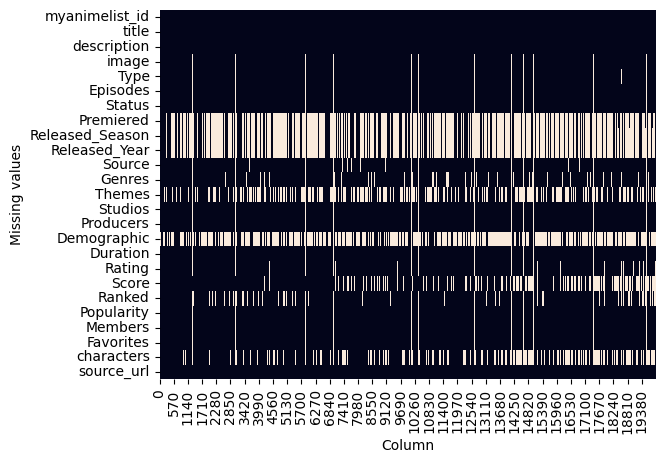

In [10]:
ax = plt.axes()
sns.heatmap(animes.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Column")
plt.ylabel("Missing values")

plt.show()

In [17]:
import numpy as np

animes["missing_description"] = np.where(animes["description"].isna(), 1, 0)
animes["age_of_anime"] = 2025 - animes["Released_Year"]
animes["Episodes"] = pd.to_numeric(animes["Episodes"], errors="coerce")

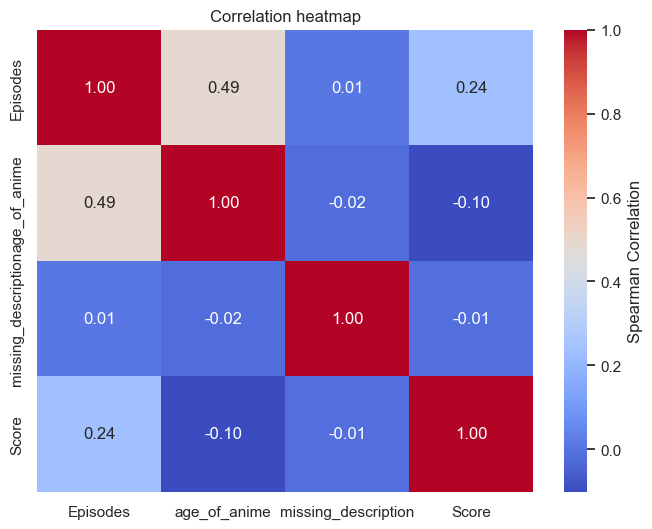

In [18]:
columns_of_interest = ["Episodes", "age_of_anime", "missing_description", "Score"]

correlation_matrix = animes[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman Correlation"})

heatmap.set_title("Correlation heatmap")
plt.show()

In [21]:
anime_missing = animes[
    ~(animes["description"].isna()) &
    ~(animes["Episodes"].isna()) &
    ~(animes["Score"].isna()) &
    ~(animes["Released_Year"].isna())
]


In [22]:
anime_missing

,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url,missing_description,age_of_anime
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop,0,27.0
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun,0,27.0
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...,0,23.0
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52.0,Finished Airing,Fall 2004,Fall,2004.0,...,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet,0,21.0
5,15,Eyeshield 21,"Shy, reserved, and small-statured, Deimon High...",https://cdn.myanimelist.net/images/anime/1079/...,TV,145.0,Finished Airing,Spring 2005,Spring,2005.0,...,PG-13 - Teens 13 or older,7.91,#845,#1390,"193,542","2,100","[{""id"": 2539, ""name"": ""Anezaki, Mamori"", ""url""...",https://myanimelist.net/anime/15/Eyeshield_21,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19492,61793,Yami Shibai 15,Fifteenth season ofYami Shibai.,https://cdn.myanimelist.net/images/anime/1975/...,TV,13.0,Finished Airing,Summer 2025,Summer,2025.0,...,PG-13 - Teens 13 or older,5.72,#11699,#11084,"2,901",13,NaN,https://myanimelist.net/anime/61793/Yami_Shiba...,0,0.0
19505,61851,Isekai Quartet 3,Third season ofIsekai Quartet.,https://cdn.myanimelist.net/images/anime/1044/...,TV,11.0,Currently Airing,Fall 2025,Fall,2025.0,...,PG-13 - Teens 13 or older,7.70,#1355,#4329,"32,910",70,"[{""id"": 116275, ""name"": ""Albedo"", ""url"": ""http...",https://myanimelist.net/anime/61851/Isekai_Qua...,0,0.0
19524,61917,Towa no Yuugure,"After waking from a long cryogenic sleep, high...",https://cdn.myanimelist.net/images/anime/1294/...,TV,12.0,Currently Airing,Fall 2025,Fall,2025.0,...,R - 17+ (violence & profanity),7.04,#4332,#3371,"52,755",116,"[{""id"": 277769, ""name"": ""Amoru"", ""url"": ""https...",https://myanimelist.net/anime/61917/Towa_no_Yu...,0,0.0
19531,61930,Uma Musume: Cinderella Gray Part 2,Ever since horse girl Oguri Cap left the small...,https://cdn.myanimelist.net/images/anime/1120/...,TV,10.0,Currently Airing,Fall 2025,Fall,2025.0,...,PG-13 - Teens 13 or older,8.42,#203,#4584,"28,937",101,"[{""id"": 162150, ""name"": ""Oguri Cap"", ""url"": ""h...",https://myanimelist.net/anime/61930/Uma_Musume...,0,0.0


In [23]:
anime_missing["Genres"].value_counts().reset_index().sort_values("count", ascending=False)

,Genres,count
0,Comedy,469
1,"Comedy, Romance",171
2,"Action, Adventure, Fantasy",165
3,Slice of Life,161
4,Sports,146
...,...,...
508,"Action, Drama, Fantasy, Mystery, Romance",1
509,"Comedy, Gourmet, Sports",1
510,"Award Winning, Mystery",1
511,"Action, Award Winning, Comedy",1


In [25]:
anime_missing.loc[:, "words_in_description"] = anime_missing["description"].str.split().str.len()

In [26]:
anime_missing

,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Score,Ranked,Popularity,Members,Favorites,characters,source_url,missing_description,age_of_anime,words_in_description
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop,0,27.0,169
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun,0,27.0,172
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...,0,23.0,154
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52.0,Finished Airing,Fall 2004,Fall,2004.0,...,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet,0,21.0,130
5,15,Eyeshield 21,"Shy, reserved, and small-statured, Deimon High...",https://cdn.myanimelist.net/images/anime/1079/...,TV,145.0,Finished Airing,Spring 2005,Spring,2005.0,...,7.91,#845,#1390,"193,542","2,100","[{""id"": 2539, ""name"": ""Anezaki, Mamori"", ""url""...",https://myanimelist.net/anime/15/Eyeshield_21,0,20.0,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19492,61793,Yami Shibai 15,Fifteenth season ofYami Shibai.,https://cdn.myanimelist.net/images/anime/1975/...,TV,13.0,Finished Airing,Summer 2025,Summer,2025.0,...,5.72,#11699,#11084,"2,901",13,NaN,https://myanimelist.net/anime/61793/Yami_Shiba...,0,0.0,4
19505,61851,Isekai Quartet 3,Third season ofIsekai Quartet.,https://cdn.myanimelist.net/images/anime/1044/...,TV,11.0,Currently Airing,Fall 2025,Fall,2025.0,...,7.70,#1355,#4329,"32,910",70,"[{""id"": 116275, ""name"": ""Albedo"", ""url"": ""http...",https://myanimelist.net/anime/61851/Isekai_Qua...,0,0.0,4
19524,61917,Towa no Yuugure,"After waking from a long cryogenic sleep, high...",https://cdn.myanimelist.net/images/anime/1294/...,TV,12.0,Currently Airing,Fall 2025,Fall,2025.0,...,7.04,#4332,#3371,"52,755",116,"[{""id"": 277769, ""name"": ""Amoru"", ""url"": ""https...",https://myanimelist.net/anime/61917/Towa_no_Yu...,0,0.0,132
19531,61930,Uma Musume: Cinderella Gray Part 2,Ever since horse girl Oguri Cap left the small...,https://cdn.myanimelist.net/images/anime/1120/...,TV,10.0,Currently Airing,Fall 2025,Fall,2025.0,...,8.42,#203,#4584,"28,937",101,"[{""id"": 162150, ""name"": ""Oguri Cap"", ""url"": ""h...",https://myanimelist.net/anime/61930/Uma_Musume...,0,0.0,112


In [27]:
anime_missing.loc[anime_missing["words_in_description"].between(1,4), 'description']

2471                       Second season.
2492                Sequel toMonkey Turn.
2905        Remake of theYattermanseries.
4056          More Time Bokan adventures.
4059       More adventures of Bikkuriman.
                       ...               
18446     Second season ofUnnamed Memory.
18945    Fourteenth season ofYami Shibai.
19023    Third season ofHyakushou Kizoku.
19492     Fifteenth season ofYami Shibai.
19505      Third season ofIsekai Quartet.
Name: description, Length: 73, dtype: object

In [28]:
anime_missing.loc[anime_missing["words_in_description"].between(5,14), 'description']

863              Sequel toShin Chou Kyou Ryo: Condor Hero.
2642                   The second season ofMoonlight Mile.
2805                The adventures of a young golf player.
2880                     The sequel of Lemon Angel (1988).
3004                   The first animated Ultraman series.
                               ...                        
18793                 Second part ofTower of God Season 2.
18832                Second season ofKankin Kuiki Level X.
18968    Fifth season ofMasuda Kousuke Gekijou: Gag Man...
19066              Second season ofPuniru wa Kawaii Slime.
19071    Second season ofNageki no Bourei wa Intai shitai.
Name: description, Length: 220, dtype: object

In [29]:
anime_missing.loc[anime_missing["words_in_description"].between(15,24), 'description']

313      Insecure Ai Shiomi begins attending the presti...
657      A group of 5 male high school students that ca...
999      The history is placed right after the -cliffha...
2034     Panda-Z chronicles the misadventures of Pan Ta...
2150     Shuramaru is hated and feared by the villagers...
                               ...                        
17092    A new series of anime shorts based on Atsushi ...
17425    The collection of horror short stories center ...
17600    No synopsis information has been added to this...
18365    No synopsis information has been added to this...
18997    A short-form slice of life anime about a team ...
Name: description, Length: 164, dtype: object

In [30]:
anime_missing.loc[anime_missing["words_in_description"].between(25,34), 'description']

628      Sentimental Journey is a collection of twelve ...
793      One year after goddess Belldandy emerged from ...
799      In this sequel, a girl named Kazusano Kazuki j...
868      When Yoshinaga Futaba wins the first prize in ...
956      Kunyan lives her crazy life of misadventures f...
                               ...                        
16893    A tournament to decide the strongest Vanguard ...
17406    Chibi shorts shown after each episode ofShuuma...
17725    College student Tokiwa gets invited to a mixer...
18510    Naoe-kun wa Yasesasetai.is a weekly mini anime...
19353    A weekly mini anime shown with each episode of...
Name: description, Length: 146, dtype: object

In [31]:
anime_missing_25_words = anime_missing[anime_missing["words_in_description"] >= 25]

In [32]:
anime_missing_25_words

,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Score,Ranked,Popularity,Members,Favorites,characters,source_url,missing_description,age_of_anime,words_in_description
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop,0,27.0,169
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun,0,27.0,172
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...,0,23.0,154
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52.0,Finished Airing,Fall 2004,Fall,2004.0,...,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet,0,21.0,130
5,15,Eyeshield 21,"Shy, reserved, and small-statured, Deimon High...",https://cdn.myanimelist.net/images/anime/1079/...,TV,145.0,Finished Airing,Spring 2005,Spring,2005.0,...,7.91,#845,#1390,"193,542","2,100","[{""id"": 2539, ""name"": ""Anezaki, Mamori"", ""url""...",https://myanimelist.net/anime/15/Eyeshield_21,0,20.0,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,61339,Jibaku Shounen Hanako-kun 2 Part 2,Due to frequent misadventures with the superna...,https://cdn.myanimelist.net/images/anime/1484/...,TV,12.0,Finished Airing,Summer 2025,Summer,2025.0,...,8.02,#664,#3673,"45,603",251,"[{""id"": 160102, ""name"": ""Hanako-kun"", ""url"": ""...",https://myanimelist.net/anime/61339/Jibaku_Sho...,0,0.0,167
19353,61410,Chotto dake Ai ga Omoi Dark Elf ga Isekai kara...,A weekly mini anime shown with each episode of...,https://cdn.myanimelist.net/images/anime/1707/...,TV,12.0,Finished Airing,Spring 2025,Spring,2025.0,...,5.56,#12390,#10091,"3,914",12,"[{""id"": 212160, ""name"": ""Mariabelle"", ""url"": ""...",https://myanimelist.net/anime/61410/Chotto_dak...,0,0.0,27
19524,61917,Towa no Yuugure,"After waking from a long cryogenic sleep, high...",https://cdn.myanimelist.net/images/anime/1294/...,TV,12.0,Currently Airing,Fall 2025,Fall,2025.0,...,7.04,#4332,#3371,"52,755",116,"[{""id"": 277769, ""name"": ""Amoru"", ""url"": ""https...",https://myanimelist.net/anime/61917/Towa_no_Yu...,0,0.0,132
19531,61930,Uma Musume: Cinderella Gray Part 2,Ever since horse girl Oguri Cap left the small...,https://cdn.myanimelist.net/images/anime/1120/...,TV,10.0,Currently Airing,Fall 2025,Fall,2025.0,...,8.42,#203,#4584,"28,937",101,"[{""id"": 162150, ""name"": ""Oguri Cap"", ""url"": ""h...",https://myanimelist.net/anime/61930/Uma_Musume...,0,0.0,112


In [36]:
anime_missing_25_words.loc[:, "tagged_description"] = anime_missing_25_words[["myanimelist_id", "description"]].astype(str).agg(" ".join, axis=1)

In [37]:
anime_missing_25_words

,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Ranked,Popularity,Members,Favorites,characters,source_url,missing_description,age_of_anime,words_in_description,tagged_description
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop,0,27.0,169,"1 Crime is timeless. By the year 2071, humanit..."
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26.0,Finished Airing,Spring 1998,Spring,1998.0,...,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun,0,27.0,172,"6 Vash the Stampede is the man with a $$60,000..."
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...,0,23.0,154,"7 Though hidden away from the general public, ..."
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52.0,Finished Airing,Fall 2004,Fall,2004.0,...,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet,0,21.0,130,8 It is the dark century and the people are su...
5,15,Eyeshield 21,"Shy, reserved, and small-statured, Deimon High...",https://cdn.myanimelist.net/images/anime/1079/...,TV,145.0,Finished Airing,Spring 2005,Spring,2005.0,...,#845,#1390,"193,542","2,100","[{""id"": 2539, ""name"": ""Anezaki, Mamori"", ""url""...",https://myanimelist.net/anime/15/Eyeshield_21,0,20.0,168,"15 Shy, reserved, and small-statured, Deimon H..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,61339,Jibaku Shounen Hanako-kun 2 Part 2,Due to frequent misadventures with the superna...,https://cdn.myanimelist.net/images/anime/1484/...,TV,12.0,Finished Airing,Summer 2025,Summer,2025.0,...,#664,#3673,"45,603",251,"[{""id"": 160102, ""name"": ""Hanako-kun"", ""url"": ""...",https://myanimelist.net/anime/61339/Jibaku_Sho...,0,0.0,167,61339 Due to frequent misadventures with the s...
19353,61410,Chotto dake Ai ga Omoi Dark Elf ga Isekai kara...,A weekly mini anime shown with each episode of...,https://cdn.myanimelist.net/images/anime/1707/...,TV,12.0,Finished Airing,Spring 2025,Spring,2025.0,...,#12390,#10091,"3,914",12,"[{""id"": 212160, ""name"": ""Mariabelle"", ""url"": ""...",https://myanimelist.net/anime/61410/Chotto_dak...,0,0.0,27,61410 A weekly mini anime shown with each epis...
19524,61917,Towa no Yuugure,"After waking from a long cryogenic sleep, high...",https://cdn.myanimelist.net/images/anime/1294/...,TV,12.0,Currently Airing,Fall 2025,Fall,2025.0,...,#4332,#3371,"52,755",116,"[{""id"": 277769, ""name"": ""Amoru"", ""url"": ""https...",https://myanimelist.net/anime/61917/Towa_no_Yu...,0,0.0,132,61917 After waking from a long cryogenic sleep...
19531,61930,Uma Musume: Cinderella Gray Part 2,Ever since horse girl Oguri Cap left the small...,https://cdn.myanimelist.net/images/anime/1120/...,TV,10.0,Currently Airing,Fall 2025,Fall,2025.0,...,#203,#4584,"28,937",101,"[{""id"": 162150, ""name"": ""Oguri Cap"", ""url"": ""h...",https://myanimelist.net/anime/61930/Uma_Musume...,0,0.0,112,61930 Ever since horse girl Oguri Cap left the...


In [38]:
(
    anime_missing_25_words
    .drop(["Type", "missing_description", "age_of_anime", "words_in_description"], axis=1)
    .to_csv("animes_cleaned.csv", index=False)
)